<center style="font-size: 2.7rem;
    font-weight: 600;"> Task 3: NLP</center>

 <center style="font-size: 2.7rem;
    font-weight: 600;">MIDAS@IIITD Summer Internship/RA Task 2021
</center>


### TASK TODO
- [x] <span style="color:green">Show how you would clean and process the data </span>
- [x] <span style="color:green">Show how you would visualize this data</span>
- [x] <span style="color:green">Show how you would measure the accuracy of the model</span>
- [x] <span style="color:green">What ideas do you have to improve the accuracy of the model? What other algorithms would you try?</span>


# Project Work

# 1. Preprocessing and Cleaning of data

#### Loading Libraries

In [2]:
import pandas as pd
import numpy as np
import csv
import re #regular expression
import string
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import seaborn as sns # To visualize the amazingly in coloful patterns
import warnings
warnings.filterwarnings('ignore')


####  Loading Data

In [3]:

#.head print out a few rows to keep as a visual reference. 
flipkart_df = pd.read_csv("flipkart.csv")
totallen=len(flipkart_df)
flipkart_df.head()


,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [4]:
#.info provides the essential details about your dataset, such as the number of rows and columns
flipkart_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

<AxesSubplot:>

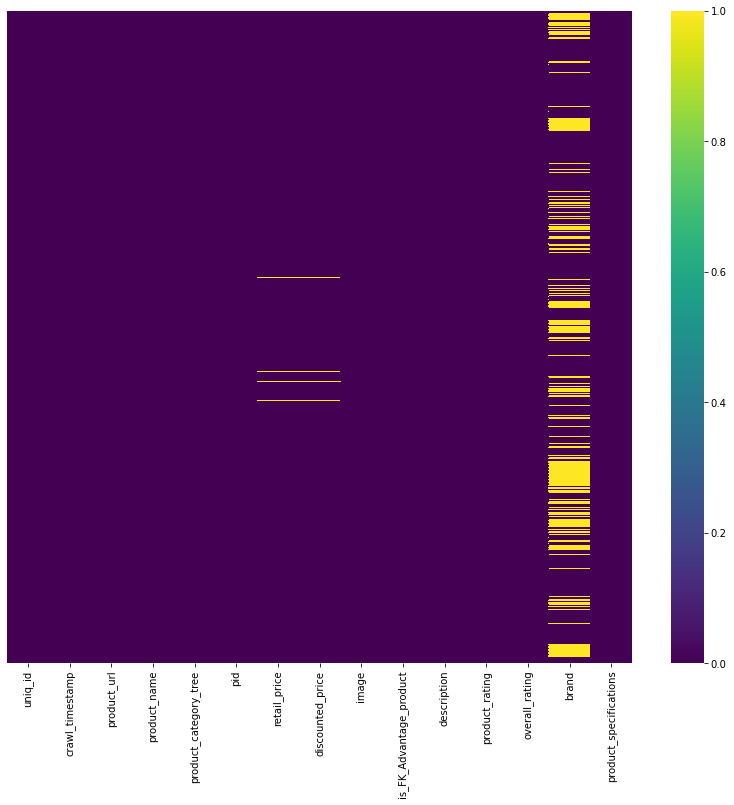

In [5]:
# let us visualize the missing data in percentages using basic numerical equation
data_missing = flipkart_df.isnull().sum()*100/len(flipkart_df)

# Type-1 of plotting the missing data
plt.figure(figsize=(14,12))
sns.heatmap(flipkart_df.isnull(),yticklabels=False,cmap='viridis')

<AxesSubplot:>

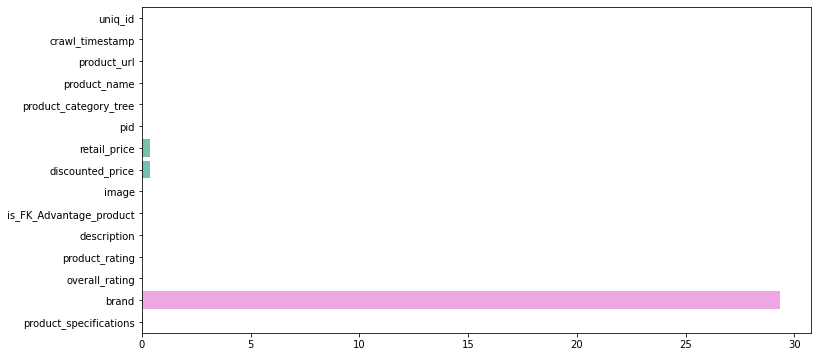

In [6]:
# Type - 2
# Plotting the missing data in a horizontal barplot
plt.figure(figsize=(12,6)) # To set the size of figure in the working cell
sns.barplot(data_missing.values, data_missing.index, alpha=0.75)

In [7]:
#.shape outputs just a tuple of (rows, columns):
flipkart_df.shape


(20000, 15)

In [8]:
flipkart_df.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [9]:
# .isnull() gives total number of nulls in each column of our dataset.
flipkart_df.isnull()


,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
19996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
19997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
19998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
# .sum() gives the number of nulls in each column we use an aggregate function for summing:
flipkart_df.isnull().sum()


uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 78
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64

In [11]:
# Using describe() on an entire DataFrame we can get a summary of the distribution of continuous variables:
flipkart_df.describe()


,retail_price,discounted_price
count,19922.000000,19922.000000
mean,2979.206104,1973.401767
std,9009.639341,7333.586040
min,35.000000,35.000000
25%,666.000000,350.000000
50%,1040.000000,550.000000
75%,1999.000000,999.000000
max,571230.000000,571230.000000


In [12]:
# .describe() can also be used on a categorical variable to get the count of rows, unique count of categories, top category, and freq of top category
flipkart_df['description'].describe()


count                                                 19998
unique                                                17539
top       TheLostPuppy Back Cover for Apple iPad Air (Mu...
freq                                                     92
Name: description, dtype: object

In [13]:
#.value_counts() can tell us the frequency of all values in a column:
flipkart_df['description'].value_counts().head(10)


TheLostPuppy Back Cover for Apple iPad Air (Multicolor)\n                         Price: Rs. 599\n\t\t\t\t\n\t\t\tDesigned to protect and impress. The Lost Puppy brings you robust mobile covers in all sizes. With the special anti-slip technology this protects your phone in more ways than one. The matte finish and superior quality add elegance, class and sturdiness to the covers.\nDesigned to protect and impress. The Lost Puppy brings you robust mobile covers in all sizes. With the special anti-slip technology this protects your phone in more ways than one. The matte finish and superior quality add elegance, class and sturdiness to the covers.                                                                                                                                                                                                                                                                                                                                                              

In [14]:
# Relationships between continuous variables
flipkart_df.corr()


,retail_price,discounted_price,is_FK_Advantage_product
retail_price,1.000000,0.981180,-0.026783
discounted_price,0.981180,1.000000,-0.018551
is_FK_Advantage_product,-0.026783,-0.018551,1.000000


# 2. Data Preparation & Data Cleaning

#### From the visualizations I have observed that there are lot of data missing in the Brand column
#### So I am dropping the brand column to avoid further hurdles while analyzing the data

In [15]:
# Drop the column data from a dataframe using
flipkart_df.drop(labels='brand', axis=1, inplace=True)

In [16]:
flipkart_df.isnull().sum()


uniq_id                     0
crawl_timestamp             0
product_url                 0
product_name                0
product_category_tree       0
pid                         0
retail_price               78
discounted_price           78
image                       3
is_FK_Advantage_product     0
description                 2
product_rating              0
overall_rating              0
product_specifications     14
dtype: int64

In [17]:
flipkart_df.notnull().head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,product_specifications
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [18]:
# Let us have a look at the uniqe values present in data
cols = flipkart_df.columns
def Unique_Values():
    for i in np.arange(0,len(cols)):
        print('There are {} nos of unique values in {} column out of {}'.format(flipkart_df[cols[i]].nunique(), cols[i], len(flipkart_df)))
Unique_Values()

There are 20000 nos of unique values in uniq_id column out of 20000
There are 371 nos of unique values in crawl_timestamp column out of 20000
There are 20000 nos of unique values in product_url column out of 20000
There are 12676 nos of unique values in product_name column out of 20000
There are 6466 nos of unique values in product_category_tree column out of 20000
There are 19998 nos of unique values in pid column out of 20000
There are 2247 nos of unique values in retail_price column out of 20000
There are 2448 nos of unique values in discounted_price column out of 20000
There are 18589 nos of unique values in image column out of 20000
There are 2 nos of unique values in is_FK_Advantage_product column out of 20000
There are 17539 nos of unique values in description column out of 20000
There are 36 nos of unique values in product_rating column out of 20000
There are 36 nos of unique values in overall_rating column out of 20000
There are 18825 nos of unique values in product_specificat

#### I am performing column study one by one to observe the pattern of data and clean it if required

# COLUMN 1

In [19]:
flipkart_df['uniq_id'].nunique()/len(flipkart_df)

1.0

#### uniq_id -  there was no missing values of uniq_id

# COLUMN 2

In [20]:
flipkart_df['crawl_timestamp'][0] # Look at the first element of this column data
# Let us convert this time stamp into year & month for analysis part as per our objective no 5

'2016-03-25 22:59:23 +0000'

In [21]:
#make this column into a datetime type for workability
flipkart_df['crawl_timestamp'] = pd.to_datetime(flipkart_df['crawl_timestamp'])

In [22]:
# Let us grab the year seperated by creating an another column & we will drop/utilize this timestamp later
flipkart_df['sale_year'] = flipkart_df['crawl_timestamp'].apply(lambda x: x.year)

In [23]:
# Let us grab the month seperated by creating an another column & we will drop/utilize this timestamp later
flipkart_df['sale_month'] = flipkart_df['crawl_timestamp'].apply(lambda x: x.month)

# COLUMN 4

In [24]:
flipkart_df[cols[3]].value_counts()[:10] 

TheLostPuppy Back Cover for Apple iPad Air                       134
TheLostPuppy Back Cover for Apple iPad Air 2                      95
S4S Stylish Women's Push-up Bra                                   94
Voylla Metal, Alloy Necklace                                      66
WallDesign Small Vinyl Sticker                                    65
HomeeHub Polyester Multicolor Self Design Eyelet Door Curtain     58
DailyObjects Back Cover for Apple iPad 2/3/4                      52
Nimya Solid Men's Polo Neck T-Shirt                               50
S4S Comfortable Women's Full Coverage Bra                         45
Grafion by Grafion - Comfort Feel Women's Full Coverage Bra       44
Name: product_name, dtype: int64

#### These are the top 10 products sold from the observed data 

# COLUMN 5

In [25]:
flipkart_df['product_category_tree'][0]

'["Clothing >> Women\'s Clothing >> Lingerie, Sleep & Swimwear >> Shorts >> Alisha Shorts >> Alisha Solid Women\'s Cycling Shorts"]'

#### --> This column consist of categories followed by sub-categories. This will be splitted into sub-categories using split() command

In [26]:
# Let us define the categories initially to prepare a mockup later upto 3 sub categories
categories = ['Primary_Category', 'Secondary_Category', 'Tertiary_Category', 'Quaternary_Category']

In [27]:
# Apply a loop for Categorical Splits & add the categories into the Dataframe
def Categorcal_Splits():
    for num in [0,1,2,3]:
        if num == 0:
            flipkart_df[categories[num]] = flipkart_df['product_category_tree'].apply(lambda x: x.split('>>')[num])
        elif num == 1:
            flipkart_df[categories[num]] = flipkart_df['product_category_tree'].apply(lambda x: x.split('>>')[num:num+1])
        elif num == 2:
            flipkart_df[categories[num]] = flipkart_df['product_category_tree'].apply(lambda x: x.split('>>')[num:num+1])
        elif num == 3:
            flipkart_df[categories[num]] = flipkart_df['product_category_tree'].apply(lambda x: x.split('>>')[num:num+1])
Categorcal_Splits()

In [28]:
flipkart_df.head(3)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,product_specifications,sale_year,sale_month,Primary_Category,Secondary_Category,Tertiary_Category,Quaternary_Category
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Number of ...",2016,3,"[""Clothing",[ Women's Clothing ],"[ Lingerie, Sleep & Swimwear ]",[ Shorts ]
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23+00:00,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Installati...",2016,3,"[""Furniture",[ Living Room Furniture ],[ Sofa Beds & Futons ],[ FabHomeDecor Fabric Double Sofa Bed (Finish ...
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23+00:00,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Ideal For""...",2016,3,"[""Footwear",[ Women's Footwear ],[ Ballerinas ],"[ AW Bellies""]]"


In [29]:
# Let us clean the new category column data more seperately by defining a function
flipkart_df['Primary_Category'] = flipkart_df['Primary_Category'].apply(lambda x: x.split('["')[1])

In [30]:
# We can have a clean look at the primary_category now
flipkart_df['Primary_Category'][:10]

0                                            Clothing 
1                                           Furniture 
2                                            Footwear 
3                                            Clothing 
4                                        Pet Supplies 
5    Eternal Gandhi Super Series Crystal Paper Weig...
6                                            Clothing 
7                                           Furniture 
8                                            Footwear 
9                                            Clothing 
Name: Primary_Category, dtype: object

In [31]:
flipkart_df.head(5)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,product_specifications,sale_year,sale_month,Primary_Category,Secondary_Category,Tertiary_Category,Quaternary_Category
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Number of ...",2016,3,Clothing,[ Women's Clothing ],"[ Lingerie, Sleep & Swimwear ]",[ Shorts ]
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23+00:00,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Installati...",2016,3,Furniture,[ Living Room Furniture ],[ Sofa Beds & Futons ],[ FabHomeDecor Fabric Double Sofa Bed (Finish ...
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23+00:00,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Ideal For""...",2016,3,Footwear,[ Women's Footwear ],[ Ballerinas ],"[ AW Bellies""]]"
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Number of ...",2016,3,Clothing,[ Women's Clothing ],"[ Lingerie, Sleep & Swimwear ]",[ Shorts ]
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23+00:00,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Pet Type"",...",2016,3,Pet Supplies,[ Grooming ],[ Skin & Coat Care ],[ Shampoo ]


In [32]:
for i in [1,2,3]:
    flipkart_df[categories[i]] = flipkart_df[categories[i]].apply(lambda x: str(x))
    flipkart_df[categories[i]] = flipkart_df[categories[i]].apply(lambda x: x[2:-2])

In [33]:
flipkart_df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,product_specifications,sale_year,sale_month,Primary_Category,Secondary_Category,Tertiary_Category,Quaternary_Category
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Number of ...",2016,3,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23+00:00,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Installati...",2016,3,Furniture,Living Room Furniture,Sofa Beds & Futons,FabHomeDecor Fabric Double Sofa Bed (Finish C...
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23+00:00,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Ideal For""...",2016,3,Footwear,Women's Footwear,Ballerinas,"AW Bellies""]"
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Number of ...",2016,3,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23+00:00,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Pet Type"",...",2016,3,Pet Supplies,Grooming,Skin & Coat Care,Shampoo


In [34]:
flipkart_df['Discount%'] = round((flipkart_df['retail_price'] - flipkart_df['discounted_price'])*100/flipkart_df['retail_price'], 1)

In [35]:
flipkart_df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,...,product_rating,overall_rating,product_specifications,sale_year,sale_month,Primary_Category,Secondary_Category,Tertiary_Category,Quaternary_Category,Discount%
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Number of ...",2016,3,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts,62.1
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23+00:00,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Installati...",2016,3,Furniture,Living Room Furniture,Sofa Beds & Futons,FabHomeDecor Fabric Double Sofa Bed (Finish C...,29.6
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23+00:00,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Ideal For""...",2016,3,Footwear,Women's Footwear,Ballerinas,"AW Bellies""]",50.1
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Number of ...",2016,3,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts,61.8
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23+00:00,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Pet Type"",...",2016,3,Pet Supplies,Grooming,Skin & Coat Care,Shampoo,4.5


## FINAL DATA FRAME

In [36]:
flipkart_df.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'product_specifications', 'sale_year', 'sale_month',
       'Primary_Category', 'Secondary_Category', 'Tertiary_Category',
       'Quaternary_Category', 'Discount%'],
      dtype='object')

In [37]:
col_study = ['product_name','Primary_Category','retail_price','discounted_price','description','Discount%','sale_month','sale_year',
             'Secondary_Category','Tertiary_Category','Quaternary_Category',]
flipkart1_df = flipkart_df[col_study]

In [38]:
# Head of our Dataframe
flipkart1_df.head()

,product_name,Primary_Category,retail_price,discounted_price,description,Discount%,sale_month,sale_year,Secondary_Category,Tertiary_Category,Quaternary_Category
0,Alisha Solid Women's Cycling Shorts,Clothing,999.0,379.0,Key Features of Alisha Solid Women's Cycling S...,62.1,3,2016,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts
1,FabHomeDecor Fabric Double Sofa Bed,Furniture,32157.0,22646.0,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,29.6,3,2016,Living Room Furniture,Sofa Beds & Futons,FabHomeDecor Fabric Double Sofa Bed (Finish C...
2,AW Bellies,Footwear,999.0,499.0,Key Features of AW Bellies Sandals Wedges Heel...,50.1,3,2016,Women's Footwear,Ballerinas,"AW Bellies""]"
3,Alisha Solid Women's Cycling Shorts,Clothing,699.0,267.0,Key Features of Alisha Solid Women's Cycling S...,61.8,3,2016,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts
4,Sicons All Purpose Arnica Dog Shampoo,Pet Supplies,220.0,210.0,Specifications of Sicons All Purpose Arnica Do...,4.5,3,2016,Grooming,Skin & Coat Care,Shampoo


####  Convert all text data into SmallCase

In [39]:
#convert text to small case
flipkart1_df['product_name'] = flipkart1_df['product_name'].str.lower()
print("Converted to small case")

Converted to small case


In [40]:
#convert text to small case
flipkart1_df['Primary_Category'] = flipkart1_df['Primary_Category'].str.lower()
print("Converted to small case")

Converted to small case


In [41]:
#convert text to small case
flipkart1_df['Secondary_Category'] = flipkart1_df['Secondary_Category'].str.lower()
print("Converted to small case")

Converted to small case


In [42]:
#convert text to small case
flipkart1_df['Tertiary_Category'] = flipkart1_df['Tertiary_Category'].str.lower()
print("Converted to small case")

Converted to small case


In [43]:
#convert text to small case
flipkart1_df['Quaternary_Category'] = flipkart1_df['Quaternary_Category'].str.lower()
print("Converted to small case")

Converted to small case


In [79]:
#convert text to small case
flipkart1_df['description'] = flipkart1_df['description'].str.lower()
print("Converted to small case")

Converted to small case


In [80]:
flipkart1_df.head()

,product_name,Primary_Category,retail_price,discounted_price,description,Discount%,sale_month,sale_year,Secondary_Category,Tertiary_Category,Quaternary_Category
0,alisha solid women cycling shorts,clothing,999.0,379.0,key features of alisha solid women's cycling s...,62.1,3,2016,women clothing,lingeriesleepswimwear,shorts
1,fabhomedecor fabric double sofa bed,furniture,32157.0,22646.0,fabhomedecor fabric double sofa bed (finish co...,29.6,3,2016,living room furniture,sofa bedsfutons,fabhomedecor fabric double sofa bedfinish colo
2,aw bellies,footwear,999.0,499.0,key features of aw bellies sandals wedges heel...,50.1,3,2016,women footwear,ballerinas,aw bellies
3,alisha solid women cycling shorts,clothing,699.0,267.0,key features of alisha solid women's cycling s...,61.8,3,2016,women clothing,lingeriesleepswimwear,shorts
4,sicons purpose arnica dog shampoo,pet supplies,220.0,210.0,specifications of sicons all purpose arnica do...,4.5,3,2016,grooming,skincoat care,shampoo


####  Remove Numbers 

In [45]:
#removes numbers from text
flipkart1_df['product_name'] = flipkart1_df['product_name'].str.replace('\d+', '')
print("Numbers are removed from text")

Numbers are removed from text


In [46]:
#removes numbers from text
flipkart1_df['Primary_Category'] = flipkart1_df['Primary_Category'].str.replace('\d+', '')
print("Numbers are removed from text")

Numbers are removed from text


In [47]:
#removes numbers from text
flipkart1_df['Secondary_Category'] = flipkart1_df['Secondary_Category'].str.replace('\d+', '')
print("Numbers are removed from text")

Numbers are removed from text


In [48]:
#removes numbers from text
flipkart1_df['Tertiary_Category'] = flipkart1_df['Tertiary_Category'].str.replace('\d+', '')
print("Numbers are removed from text")

Numbers are removed from text


In [49]:
#removes numbers from text
flipkart1_df['Quaternary_Category'] = flipkart1_df['Quaternary_Category'].str.replace('\d+', '')
print("Numbers are removed from text")

Numbers are removed from text


In [81]:
#removes numbers from text
flipkart1_df['description'] = flipkart1_df['description'].str.replace('\d+', '')
print("Numbers are removed from text")

Numbers are removed from text


####  Remove Single Character

In [82]:
#remove single character chracter
flipkart1_df['product_name'] = flipkart1_df['product_name'].replace(re.compile(r"(^| ).( |$)"), "")
print("Single character words are Removed")

Single character words are Removed


In [83]:
#remove single character chracter
flipkart1_df['Primary_Category'] = flipkart1_df['Primary_Category'].replace(re.compile(r"(^| ).( |$)"), "")
print("Single character words are Removed")

Single character words are Removed


In [84]:
#remove single character chracter
flipkart1_df['Secondary_Category'] = flipkart1_df['Secondary_Category'].replace(re.compile(r"(^| ).( |$)"), "")
print("Single character words are Removed")

Single character words are Removed


In [85]:
#remove single character chracter
flipkart1_df['Tertiary_Category'] = flipkart1_df['Tertiary_Category'].replace(re.compile(r"(^| ).( |$)"), "")
print("Single character words are Removed")

Single character words are Removed


In [86]:
#remove single character chracter
flipkart1_df['Quaternary_Category'] = flipkart1_df['Quaternary_Category'].replace(re.compile(r"(^| ).( |$)"), "")
print("Single character words are Removed")

Single character words are Removed


In [87]:
#remove single character chracter
flipkart1_df['description'] = flipkart1_df['description'].replace(re.compile(r"(^| ).( |$)"), "")
print("Single character words are Removed")

Single character words are Removed


####  Remove Hyperlink's

In [88]:
#removes links and urls
flipkart1_df['product_name'] = flipkart1_df['product_name'].replace(re.compile(r'((www\.[\S]+)|(https?://[\S]+))'),"")
print("HyperLinks are removed")

HyperLinks are removed


In [89]:
#removes links and urls
flipkart1_df['Primary_Category'] = flipkart1_df['Primary_Category'].replace(re.compile(r'((www\.[\S]+)|(https?://[\S]+))'),"")
print("HyperLinks are removed")

HyperLinks are removed


In [90]:
#removes links and urls
flipkart1_df['Secondary_Category'] = flipkart1_df['Secondary_Category'].replace(re.compile(r'((www\.[\S]+)|(https?://[\S]+))'),"")
print("HyperLinks are removed")

HyperLinks are removed


In [91]:
#removes links and urls
flipkart1_df['Tertiary_Category'] = flipkart1_df['Tertiary_Category'].replace(re.compile(r'((www\.[\S]+)|(https?://[\S]+))'),"")
print("HyperLinks are removed")

HyperLinks are removed


In [94]:
#removes links and urls
flipkart1_df['Quaternary_Category'] = flipkart1_df['Quaternary_Category'].replace(re.compile(r'((www\.[\S]+)|(https?://[\S]+))'),"")
print("HyperLinks are removed")

HyperLinks are removed


In [95]:
#removes links and urls
flipkart1_df['description'] = flipkart1_df['description'].replace(re.compile(r'((www\.[\S]+)|(https?://[\S]+))'),"")
print("HyperLinks are removed")

HyperLinks are removed


#### Remove Punctuation & Special Character's

In [96]:
#removes Punctuation
flipkart1_df['product_name'] = flipkart1_df['product_name'].str.replace('[^\w\s]',' ').str.replace('\s\s+', '')
print("Punctuation & Special characters are removed...")

Punctuation & Special characters are removed...


In [97]:
#removes Punctuation
flipkart1_df['Primary_Category'] = flipkart1_df['Primary_Category'].str.replace('[^\w\s]',' ').str.replace('\s\s+', '')
print("Punctuation & Special characters are removed...")

Punctuation & Special characters are removed...


In [99]:
#removes Punctuation
flipkart1_df['Secondary_Category'] = flipkart1_df['Secondary_Category'].str.replace('[^\w\s]',' ').str.replace('\s\s+', '')
print("Punctuation & Special characters are removed...")

Punctuation & Special characters are removed...


In [100]:
#removes Punctuation
flipkart1_df['Tertiary_Category'] = flipkart1_df['Tertiary_Category'].str.replace('[^\w\s]',' ').str.replace('\s\s+', '')
print("Punctuation & Special characters are removed...")

Punctuation & Special characters are removed...


In [101]:
#removes Punctuation
flipkart1_df['Quaternary_Category'] = flipkart1_df['Quaternary_Category'].str.replace('[^\w\s]',' ').str.replace('\s\s+', '')
print("Punctuation & Special characters are removed...")

Punctuation & Special characters are removed...


In [102]:
#removes Punctuation
flipkart1_df['description'] = flipkart1_df['description'].str.replace('[^\w\s]',' ').str.replace('\s\s+', '')
print("Punctuation & Special characters are removed...")

Punctuation & Special characters are removed...


####  Remove Stop Words

In [103]:
#stops words
stop = stopwords.words('english')

#remove stop words
flipkart1_df['product_name'] = flipkart1_df['product_name'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
print("Stop words are removed...")

Stop words are removed...


In [104]:
#stops words
stop = stopwords.words('english')

#remove stop words
flipkart1_df['Primary_Category'] = flipkart1_df['Primary_Category'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
print("Stop words are removed...")

Stop words are removed...


In [105]:
#stops words
stop = stopwords.words('english')

#remove stop words
flipkart1_df['Secondary_Category'] = flipkart1_df['Secondary_Category'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
print("Stop words are removed...")

Stop words are removed...


In [106]:
#stops words
stop = stopwords.words('english')

#remove stop words
flipkart1_df['Tertiary_Category'] = flipkart1_df['Tertiary_Category'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
print("Stop words are removed...")

Stop words are removed...


In [107]:
#stops words
stop = stopwords.words('english')

#remove stop words
flipkart1_df['Quaternary_Category'] = flipkart1_df['Quaternary_Category'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
print("Stop words are removed...")

Stop words are removed...


####  Remove extra spaces

In [111]:
flipkart1_df['product_name']=flipkart1_df['product_name'].str.strip()
flipkart1_df['product_name'] = flipkart1_df['product_name'].replace(re.compile(r"(^| ).( |$)"), " ")
print("Extra spaces are removed...")

Extra spaces are removed...


In [112]:
flipkart1_df['Primary_Category']=flipkart1_df['Primary_Category'].str.strip()
flipkart1_df['Primary_Category'] = flipkart1_df['Primary_Category'].replace(re.compile(r"(^| ).( |$)"), " ")
print("Extra spaces are removed...")

Extra spaces are removed...


In [113]:
flipkart1_df['Secondary_Category']=flipkart1_df['Secondary_Category'].str.strip()
flipkart1_df['Secondary_Category'] = flipkart1_df['Secondary_Category'].replace(re.compile(r"(^| ).( |$)"), " ")
print("Extra spaces are removed...")

Extra spaces are removed...


In [114]:
flipkart1_df['Tertiary_Category']=flipkart1_df['Tertiary_Category'].str.strip()
flipkart1_df['Tertiary_Category'] = flipkart1_df['Tertiary_Category'].replace(re.compile(r"(^| ).( |$)"), " ")
print("Extra spaces are removed...")

Extra spaces are removed...


In [115]:
flipkart1_df['Quaternary_Category']=flipkart1_df['Quaternary_Category'].str.strip()
flipkart1_df['Quaternary_Category'] = flipkart1_df['Quaternary_Category'].replace(re.compile(r"(^| ).( |$)"), " ")
print("Extra spaces are removed...")

Extra spaces are removed...


In [117]:
flipkart1_df['description']=flipkart1_df['description'].str.strip()
flipkart1_df['description'] = flipkart1_df['description'].replace(re.compile(r"(^| ).( |$)"), " ")
print("Extra spaces are removed...")

Extra spaces are removed...


In [118]:
flipkart1_df.head()

,product_name,Primary_Category,retail_price,discounted_price,description,Discount%,sale_month,sale_year,Secondary_Category,Tertiary_Category,Quaternary_Category
0,alisha solid women cycling shorts,clothing,999.0,379.0,key features of alisha solid women cycling sho...,62.1,3,2016,women clothing,lingeriesleepswimwear,shorts
1,fabhomedecor fabric double sofa bed,furniture,32157.0,22646.0,fabhomedecor fabric double sofa bedfinish colo...,29.6,3,2016,living room furniture,sofa bedsfutons,fabhomedecor fabric double sofa bedfinish colo
2,aw bellies,footwear,999.0,499.0,key features of aw bellies sandals wedges heel...,50.1,3,2016,women footwear,ballerinas,aw bellies
3,alisha solid women cycling shorts,clothing,699.0,267.0,key features of alisha solid women cycling sho...,61.8,3,2016,women clothing,lingeriesleepswimwear,shorts
4,sicons purpose arnica dog shampoo,pet supplies,220.0,210.0,specifications of sicons all purpose arnica do...,4.5,3,2016,grooming,skincoat care,shampoo


####  Save Clean Data

In [119]:
#write clean data to new file
flipkart1_df.to_csv('preprocessed_data.csv',index=False, encoding="utf-8")
print("clean data is saved on preprocessed_data.csv")

clean data is saved on preprocessed_data.csv


###  Loading Model

In [121]:
from sklearn.linear_model import LogisticRegression

X = flipkart1_df['Primary_Category']
y = flipkart1_df['description']
one_hot_encoded_label = pd.get_dummies(y)
print(one_hot_encoded_label.head())

    appel du vide women sheath dressbuy red appel du vide women sheath dress for only rsonline in indiashop online for apparelshuge collection of branded clothes only at flipkart com  \
0                                                  0                                                                                                                                     
1                                                  0                                                                                                                                     
2                                                  0                                                                                                                                     
3                                                  0                                                                                                                                     
4                                                  0                  

# 3. DATA VISUALIZATION

In [122]:
# Head of our Dataframe
flipkart1_df.head()

,product_name,Primary_Category,retail_price,discounted_price,description,Discount%,sale_month,sale_year,Secondary_Category,Tertiary_Category,Quaternary_Category
0,alisha solid women cycling shorts,clothing,999.0,379.0,key features of alisha solid women cycling sho...,62.1,3,2016,women clothing,lingeriesleepswimwear,shorts
1,fabhomedecor fabric double sofa bed,furniture,32157.0,22646.0,fabhomedecor fabric double sofa bedfinish colo...,29.6,3,2016,living room furniture,sofa bedsfutons,fabhomedecor fabric double sofa bedfinish colo
2,aw bellies,footwear,999.0,499.0,key features of aw bellies sandals wedges heel...,50.1,3,2016,women footwear,ballerinas,aw bellies
3,alisha solid women cycling shorts,clothing,699.0,267.0,key features of alisha solid women cycling sho...,61.8,3,2016,women clothing,lingeriesleepswimwear,shorts
4,sicons purpose arnica dog shampoo,pet supplies,220.0,210.0,specifications of sicons all purpose arnica do...,4.5,3,2016,grooming,skincoat care,shampoo


#### AIM 1 : THE COSTLIEST PRODUCT

In [123]:
print("The costliest product sold is Rs.{}".format(int(flipkart1_df['discounted_price'].max())))

The costliest product sold is Rs.571230


In [124]:
flipkart1_df[flipkart1_df['discounted_price'] == flipkart1_df['discounted_price'].max()]

,product_name,Primary_Category,retail_price,discounted_price,description,Discount%,sale_month,sale_year,Secondary_Category,Tertiary_Category,Quaternary_Category
116,breitling ab bbchronomatanalog watch boysmen,watches,571230.0,571230.0,breitling ab bbchronomatanalog watch for boysm...,0.0,12,2015,wrist watches,breitling wrist watches,


#### AIM 2 : THE CHEAPEST PRODUCT SOLD

In [125]:
print("The cheapest product sold is Rs.{}".format(int(flipkart1_df['discounted_price'].min())))

The cheapest product sold is Rs.35


In [126]:
flipkart1_df[flipkart1_df['discounted_price'] == flipkart1_df['discounted_price'].min()]

,product_name,Primary_Category,retail_price,discounted_price,description,Discount%,sale_month,sale_year,Secondary_Category,Tertiary_Category,Quaternary_Category
10554,geol wooden wet dry broom,kitchendining,35.0,35.0,specifications of geol wooden wet and dry broo...,0.0,4,2016,housekeepinglaundry,home cleaning,broomsbrushes


#### AIM 3 : THE PRODUCT SOLD AT HIGHEST DISCOUNT

In [127]:
print("The highest discounted product sold at {}%".format(int(flipkart1_df['Discount%'].max())))

The highest discounted product sold at 96%


In [128]:
flipkart1_df[flipkart1_df['Discount%'] == flipkart1_df['Discount%'].max()]

,product_name,Primary_Category,retail_price,discounted_price,description,Discount%,sale_month,sale_year,Secondary_Category,Tertiary_Category,Quaternary_Category
17205,rajcrafts floral double quiltscomforters white,home furnishing,6000.0,208.0,rajcrafts floral double quiltscomforters white...,96.5,12,2015,bed linen,blanketsquiltsdohars,


#### AIM 4 : PER CATEGORY DISCOUNT PROVIDED

In [129]:
product_categories = flipkart1_df['Primary_Category'].value_counts()

In [130]:
product_categories = product_categories[:15]


Text(-0.9, 1.25, 'PIE Diagram for TOP 15 PRODUCT CATEGORIES')

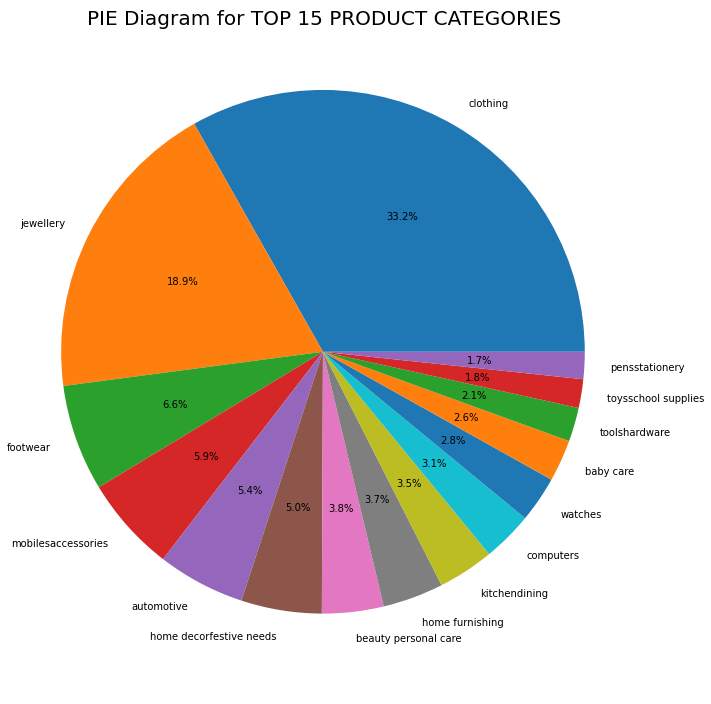

In [131]:
plt.figure(figsize=(10,10))
product_categories.plot.pie(y = product_categories.index, autopct='%1.1f%%')
plt.ylabel('')
plt.axis('equal')
plt.tight_layout()
plt.text(-0.9,1.25,'PIE Diagram for TOP 15 PRODUCT CATEGORIES', fontsize=20)

In [132]:
# Creating a Dataframe with grouping the categories to allocate mean and count using aggregate function
Primary_Category_Discounts = pd.DataFrame(flipkart1_df.groupby('Primary_Category').agg({
    'Discount%': [np.mean],
    'Primary_Category': ['count']
}))

Secondary_Category_Discounts = pd.DataFrame(flipkart1_df.groupby('Secondary_Category').agg({
    'Discount%': [np.mean],
    'Secondary_Category': ['count']
}))

Tertiary_Category_Discounts = pd.DataFrame(flipkart1_df.groupby('Tertiary_Category').agg({
    'Discount%': [np.mean],
    'Tertiary_Category': ['count']
}))

Quaternary_Category_Discounts = pd.DataFrame(flipkart1_df.groupby('Quaternary_Category').agg({
    'Discount%': [np.mean],
    'Quaternary_Category': ['count']
}))

In [133]:
Primary_Category_Discounts.head()

,Discount%,Primary_Category
,mean,count
Primary_Category,,
abeez boysmengirlsblackpack,27.6,1
abhinl fashion cotton printed semi stitched salw,61.6,1
adidas ind pro thi gua thigh guardwhiteblue,0.0,1
ajaero slim fit women dark blue jeans,55.0,2
amita home furnishing cotton floral single bedsh,50.1,1


#### I am clubbing the multiindex for visualization

In [134]:
# Using a loop I will club Multi Index and Reset the Index
disc_cate = [Primary_Category_Discounts, Secondary_Category_Discounts,
           Tertiary_Category_Discounts, Quaternary_Category_Discounts]
for i in disc_cate:
    i.columns = ['-'.join(col) for col in i.columns]
    i.reset_index(inplace=True)

In [135]:
# Let us Consider top 15 categories from every Categories
# Lets sort by Category Count
Primary_Category_Discounts = Primary_Category_Discounts.sort_values(by='Primary_Category-count', ascending=False)[:15]
Secondary_Category_Discounts = Secondary_Category_Discounts.sort_values(by='Secondary_Category-count', ascending=False)[:15]
Tertiary_Category_Discounts = Tertiary_Category_Discounts.sort_values(by='Tertiary_Category-count', ascending=False)[:15]
Quaternary_Category_Discounts = Quaternary_Category_Discounts.sort_values(by='Quaternary_Category-count', ascending=False)[:15]

In [136]:
# Lets sort the values by Discounts Now
Primary_Category_Discounts = Primary_Category_Discounts.sort_values('Discount%-mean', ascending=False)
Secondary_Category_Discounts = Secondary_Category_Discounts.sort_values('Discount%-mean', ascending=False)
Tertiary_Category_Discounts = Tertiary_Category_Discounts.sort_values('Discount%-mean', ascending=False)
Quaternary_Category_Discounts = Quaternary_Category_Discounts.sort_values('Discount%-mean', ascending=False)

<AxesSubplot:title={'center':'Primary Category Discount%'}, xlabel='Discount%-mean', ylabel='Primary_Category'>

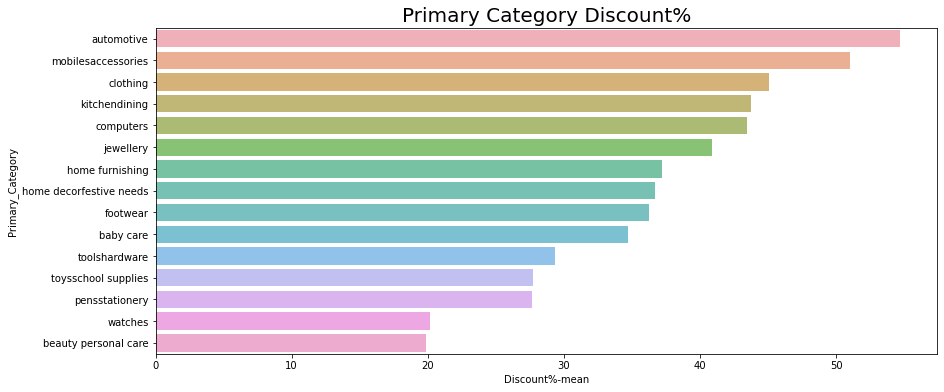

In [137]:
plt.figure(figsize=(14,6))
plt.title('Primary Category Discount%', fontsize=20)
sns.barplot(Primary_Category_Discounts['Discount%-mean'], Primary_Category_Discounts['Primary_Category'], alpha = 0.75)

<AxesSubplot:title={'center':'Secondary Category Discount%'}, xlabel='Discount%-mean', ylabel='Secondary_Category'>

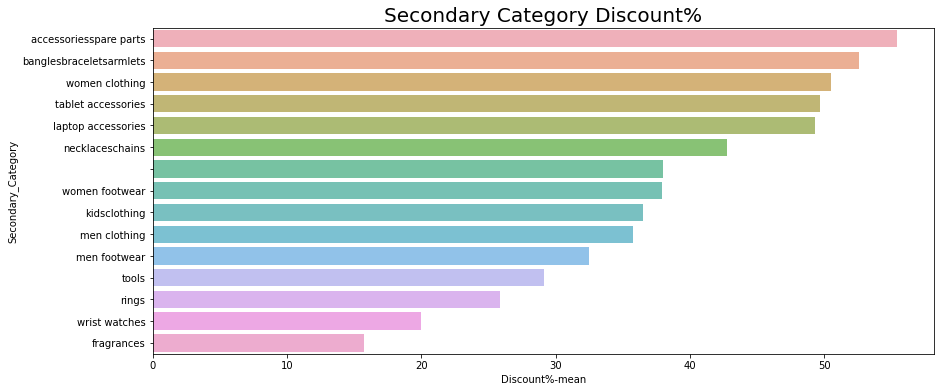

In [138]:
plt.figure(figsize=(14,6))
plt.title('Secondary Category Discount%', fontsize=20)
sns.barplot(Secondary_Category_Discounts['Discount%-mean'], Secondary_Category_Discounts['Secondary_Category'], alpha = 0.75)

<AxesSubplot:title={'center':'Tertiary Category Discount%'}, xlabel='Discount%-mean', ylabel='Tertiary_Category'>

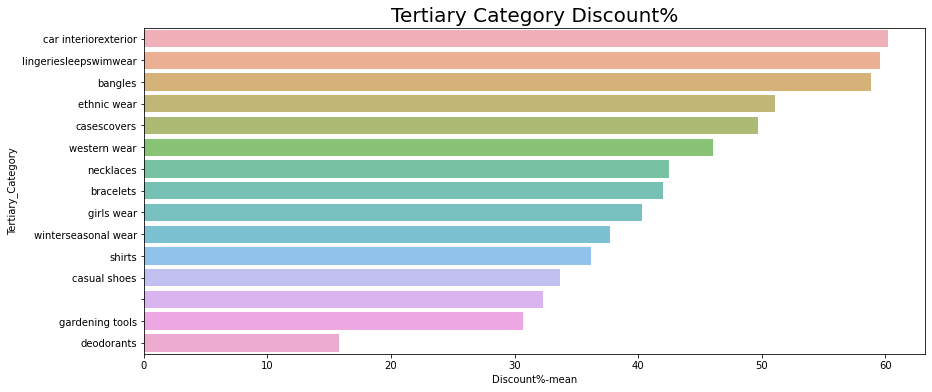

In [139]:
plt.figure(figsize=(14,6))
plt.title('Tertiary Category Discount%', fontsize=20)
sns.barplot(Tertiary_Category_Discounts['Discount%-mean'], Tertiary_Category_Discounts['Tertiary_Category'], alpha = 0.75)

<AxesSubplot:title={'center':'Quaternary Category Discount%'}, xlabel='Discount%-mean', ylabel='Quaternary_Category'>

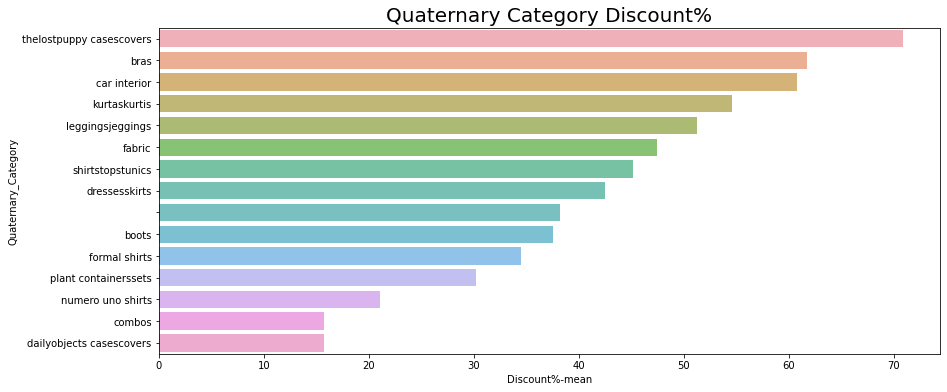

In [140]:
plt.figure(figsize=(14,6))
plt.title('Quaternary Category Discount%', fontsize=20)
sns.barplot(Quaternary_Category_Discounts['Discount%-mean'], Quaternary_Category_Discounts['Quaternary_Category'], alpha = 0.75)

#### AIM 5 : SALES DISTRIBUTION ACROSS TIME PERIOD

In [141]:
flipkart1_df.head()

,product_name,Primary_Category,retail_price,discounted_price,description,Discount%,sale_month,sale_year,Secondary_Category,Tertiary_Category,Quaternary_Category
0,alisha solid women cycling shorts,clothing,999.0,379.0,key features of alisha solid women cycling sho...,62.1,3,2016,women clothing,lingeriesleepswimwear,shorts
1,fabhomedecor fabric double sofa bed,furniture,32157.0,22646.0,fabhomedecor fabric double sofa bedfinish colo...,29.6,3,2016,living room furniture,sofa bedsfutons,fabhomedecor fabric double sofa bedfinish colo
2,aw bellies,footwear,999.0,499.0,key features of aw bellies sandals wedges heel...,50.1,3,2016,women footwear,ballerinas,aw bellies
3,alisha solid women cycling shorts,clothing,699.0,267.0,key features of alisha solid women cycling sho...,61.8,3,2016,women clothing,lingeriesleepswimwear,shorts
4,sicons purpose arnica dog shampoo,pet supplies,220.0,210.0,specifications of sicons all purpose arnica do...,4.5,3,2016,grooming,skincoat care,shampoo


In [142]:
# Let us map the month numbers names of month using map function from a dictionary
months = {1 : 'January',
         2 : 'February',
         3 : 'March',
         4 : 'April',
         5 : 'May',
         6 : 'June',
         7 : 'July',
         8 : 'August',
         9 : 'September',
         10 : 'October',
         11: 'November',
         12 : 'December'}

flipkart1_df['sale_month'] = flipkart1_df['sale_month'].map(months)

In [143]:
flipkart1_df.head()

,product_name,Primary_Category,retail_price,discounted_price,description,Discount%,sale_month,sale_year,Secondary_Category,Tertiary_Category,Quaternary_Category
0,alisha solid women cycling shorts,clothing,999.0,379.0,key features of alisha solid women cycling sho...,62.1,March,2016,women clothing,lingeriesleepswimwear,shorts
1,fabhomedecor fabric double sofa bed,furniture,32157.0,22646.0,fabhomedecor fabric double sofa bedfinish colo...,29.6,March,2016,living room furniture,sofa bedsfutons,fabhomedecor fabric double sofa bedfinish colo
2,aw bellies,footwear,999.0,499.0,key features of aw bellies sandals wedges heel...,50.1,March,2016,women footwear,ballerinas,aw bellies
3,alisha solid women cycling shorts,clothing,699.0,267.0,key features of alisha solid women cycling sho...,61.8,March,2016,women clothing,lingeriesleepswimwear,shorts
4,sicons purpose arnica dog shampoo,pet supplies,220.0,210.0,specifications of sicons all purpose arnica do...,4.5,March,2016,grooming,skincoat care,shampoo


In [144]:
monthly_sales = flipkart1_df['sale_month'].value_counts()
monthly_sales

December    10315
January      4850
March        1634
April        1137
June         1046
May           773
February      245
Name: sale_month, dtype: int64

Text(0.5, 1.0, 'Products Monthly Sales')

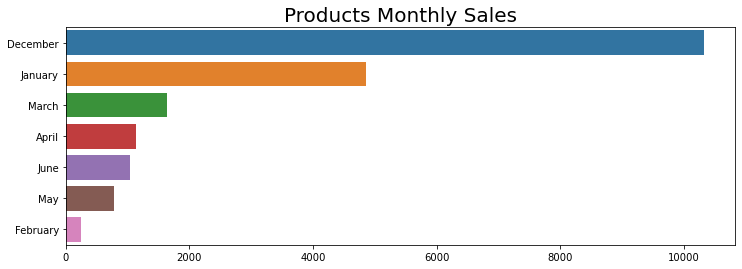

In [145]:
# MONTHLY SALES DISTRIBUTION
# Plot monthly distribution of sales
plt.figure(figsize=(12,4))
sns.barplot(monthly_sales.values, monthly_sales.index)
plt.title('Products Monthly Sales', fontsize=20)

In [146]:
yearly_sales = flipkart1_df['sale_year'].value_counts()
yearly_sales

2015    10315
2016     9685
Name: sale_year, dtype: int64

<AxesSubplot:>

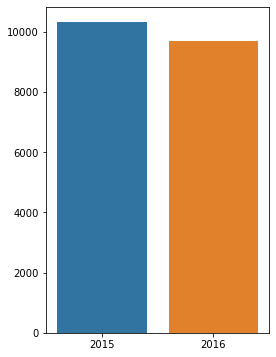

In [147]:
# YEARLY SALES DISTRIBUTION
plt.figure(figsize=(4,6))
sns.barplot(yearly_sales.index, yearly_sales.values)

#  4. TRAINING MODEL

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

## LOADING MODEL

In [149]:
from sklearn.linear_model import LogisticRegression

X = flipkart1_df['product_name']
y = flipkart1_df['Primary_Category']
one_hot_encoded_label = pd.get_dummies(y)
print(one_hot_encoded_label.head())

   abeez boysmengirlsblackpack  \
0                            0   
1                            0   
2                            0   
3                            0   
4                            0   

   abhinl fashion cotton printed semi stitched salw  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   adidas ind pro thi gua thigh guardwhiteblue  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   ajaero slim fit women dark blue jeans  \
0                                      0   
1                                      0   
2                              

###  Splitting data into training and testing data

In [150]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

print("percentage of the X_train data:{:0.2f}%".format(len(X_train)/len(flipkart1_df)*100))
print("percentage of the X_test data:{:0.2f}%".format(len(X_test)/len(flipkart1_df)*100))
print("percentage of the y_train data:{:0.2f}%".format(len(y_train)/len(flipkart1_df)*100))
print("percentage of the y_test data:{:0.2f}%".format(len(y_test)/len(flipkart1_df)*100))

percentage of the X_train data:75.00%
percentage of the X_test data:25.00%
percentage of the y_train data:75.00%
percentage of the y_test data:25.00%


###  Extracting Features

In [151]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(min_df=5).fit(X_train)
print("Features Length ", len(vect.get_feature_names()))
X_train_vectorized = vect.transform(X_train)
feature_names = np.array(vect.get_feature_names())
sorted_tfidf_index = X_train_vectorized.max(0).toarray()[0].argsort()

print('Smallest tfidf:\n{}\n'.format(feature_names[sorted_tfidf_index[:10]]))
print('Largest tfidf: \n{}'.format(feature_names[sorted_tfidf_index[:-11:-1]]))

X_train_vectorized = vect.transform(X_train)

Features Length  2008
Smallest tfidf:
['sunshadecurtainset' 'vetra' 'ety' 'mhk' 'ipadapple' 'chargingmeter'
 'lexel' 'typesun' 'offor' 'almond']

Largest tfidf: 
['zyxel' 'oil' 'nail' 'necklace' 'neo' 'netgear' 'netis' 'nike' 'note'
 'notebook']


# Train the Model

In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
c_val =[0.2,0.75, 1, 2, 3, 4, 5, 10,15,20,25]

iter=0
acc_vect=[]
for i in range(3):
    acc_val=[]
    for c in c_val:
        
        X = flipkart1_df['product_name']
        y = flipkart1_df['Primary_Category']
        one_hot_encoded_label = pd.get_dummies(y)
        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)
        from sklearn.feature_extraction.text import TfidfVectorizer
        vect = TfidfVectorizer(min_df=5).fit(X_train)
        X_train_vectorized = vect.transform(X_train)
        feature_names = np.array(vect.get_feature_names())
        sorted_tfidf_index = X_train_vectorized.max(0).toarray()[0].argsort()
        X_train_vectorized = vect.transform(X_train)
        
        model = LogisticRegression(C=c,solver='saga')
        model.fit(X_train_vectorized, y_train)
        #print ("Accuracy for C=%s: %s" % (c, accuracy_score(y_test, model.predict(vect.transform(X_test)))))
        acc_val.append(round(accuracy_score(y_test, model.predict(vect.transform(X_test))),2))
        
    flipkart1_df['Primary_Category']=model.predict(vect.transform(flipkart1_df.product_name[0:]))
    print("After : ",i+1,"run ", "Accuracy : ",acc_val[-1]*100,"%")
    acc_vect.append(acc_val)
sorted_coef_index = model.coef_[0].argsort()
#after training model
print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))
print("First two prediction ", model.predict(vect.transform(flipkart1_df.product_name[0:2])))
print("Final Accuracy :{:0.2f}".format(acc_val[-1]*100))

After :  1 run  Accuracy :  95.0 %
After :  2 run  Accuracy :  99.0 %
After :  3 run  Accuracy :  100.0 %
Smallest Coefs:
['set' 'women' 'fit' 'car' 'plastic' 'cotton' 'black' 'sunglasses' 'combo'
 'blue']

Largest Coefs: 
['pro' 'adidas' 'guard' 'zephyrr' 'zakaah' 'bridal' 'itzmyfashion'
 'specimen' 'urthn' 'urbaano']
First two prediction  ['clothing' 'furniture']
Final Accuracy :100.00


###  Model Accuracy plot and confusion matrix

####  Accuracy vs Coercion value plot

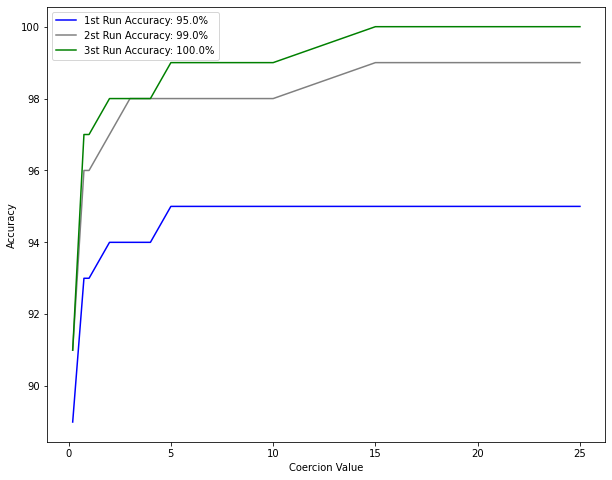

In [153]:
plt.figure(figsize=(10,8))
plt.plot(c_val, [element * 100 for element in acc_vect[0]],color="blue",label='1st Run Accuracy: '+str(acc_vect[0][-1]*100)+"%")
plt.plot(c_val, [element * 100 for element in acc_vect[1]],color="grey",label='2st Run Accuracy: '+str(acc_vect[1][-1]*100)+"%")
plt.plot(c_val, [element * 100 for element in acc_vect[2]],color="green",label='3st Run Accuracy: '+str(acc_vect[2][-1]*100)+"%")
plt.xlabel('Coercion Value')
plt.legend()
plt.ylabel('Accuracy')
plt.show()

##### Confusion matrices are used to visualize important predictive analytics like recall, specificity, accuracy, and precision.

#### Confusion Matrix

[[  1   0   0 ...   0   0   0]
 [  0   1   0 ...   0   0   0]
 [  0   0 252 ...   0   0   0]
 ...
 [  0   0   0 ...   2   0   0]
 [  0   0   0 ...   0 143   0]
 [  0   0   0 ...   0   0   1]]


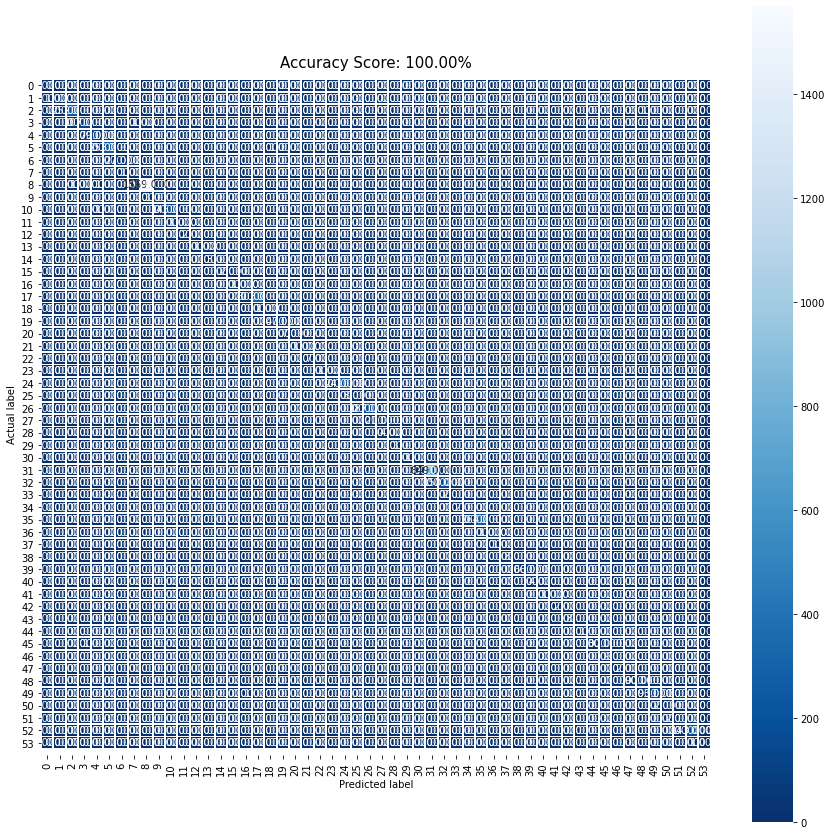

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

predictions = model.predict(vect.transform(X_test))
cm = confusion_matrix(y_test.to_numpy(), predictions)
print(cm)
plt.figure(figsize=(15,15))
ax=sns.heatmap(cm, annot=True, fmt=".3f", linewidths=1, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
ax.set_aspect("equal")
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
all_sample_title = 'Accuracy Score: {:0.2f}%'.format(acc_val[-1]*100)
plt.title(all_sample_title, size = 15);